Import libraries.

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Create a function that clusters text and plots it.

In [18]:
def cluster(l, num_clusters):
    vec = TfidfVectorizer(stop_words="english")
    vec.fit(np.asarray(l))
    features = vec.transform(np.asarray(l))
    clussy = KMeans(n_clusters=num_clusters)
    clussy.fit(features)
    clussy.predict(features)
    lab = clussy.labels_
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(clussy.cluster_centers_)
    plt.scatter(reduced_features[:,0], reduced_features[:,1], c=lab)
    plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
    plt.show()

Create a function to get optimal number of clusters using the elbow method

In [19]:
def elbow(l):
    distortions = []
    vec = TfidfVectorizer(stop_words="english")
    vec.fit(np.asarray(l))
    features = vec.transform(np.asarray(l))
    for i in range(2, 30):
        try:
            clussy = KMeans(n_clusters=i)
            clussy.fit(features)
            distortions.append(clussy.inertia_)
        except:
            break
    plt.plot(range(2, 30), distortions)
    plt.grid(True)
    plt.title('Elbow curve')
    plt.show()

Find clusters within the questions.

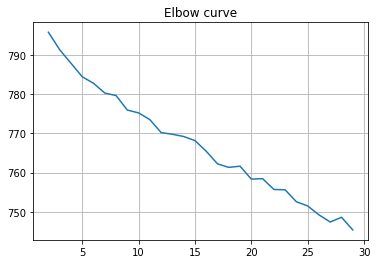

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/nbertagnolli/counsel-chat/master/data/20200325_counsel_chat.csv")
l = []
for st, sti in zip(df["questionTitle"], df["questionText"]):
    stin = (st + sti).replace("\xa0", " ")
    l.append(stin)
s = set(l)
l = list(s)
elbow(l)

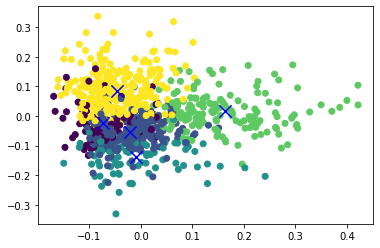

In [23]:
cluster(l, 5)